In [63]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading csv file of Zomato

df1 = pd.read_csv('zomato.csv', encoding='latin1')

# Loading xlx file of country code
df2 = pd.read_excel("Country-Code.xlsx")

# Loading the entire dataset
df = pd.merge(df2, df1,how='left',on='Country Code')
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [3]:
# Checking the dimension of data
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))


We have 9551 rows and 22 columns in our dataframe




In [4]:
# Checking the column names in our dataframe
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# Checking datatypes
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [6]:
# Understanding data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [7]:
# Duplicate Values in our Dataframe
df.duplicated().sum()

0

The dataframe does not contain any duplicate values.

In [8]:
#Checking Missing Values
print("Total {} Missing Values are present in our Dataframe".format(df.isnull().sum().sum()))


Total 9 Missing Values are present in our Dataframe


In [9]:
# Checking for Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                      Missing Values  % Missing data
Cuisines                           9        0.094231
Country Code                       0        0.000000
Currency                           0        0.000000
Rating text                        0        0.000000
Rating color                       0        0.000000
Aggregate rating                   0        0.000000
Price range                        0        0.000000
Switch to order menu               0        0.000000
Is delivering now                  0        0.000000
Has Online delivery                0        0.000000
Has Table booking                  0        0.000000
Average Cost for two               0        0.000000
Country                            0        0.000000
Latitude                           0        0.000000
Longitude                          0        0.000000
Locality Verbose                   0        0.000000
Locality                           0        0.000000
Address                            0        0.

In [10]:
# Missing Value Treatment
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [11]:
#Checking missing values again
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

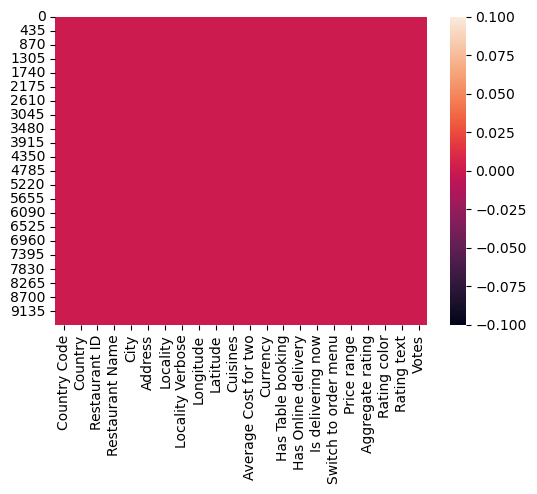

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

OBSERVATION

During the inspection process, we identified 9 missing values in the "Cuisines" column of our dataframe.

To address this issue, we chose to fill the missing values in the "Cuisines" column.

Since the "Cuisines" column is categorical, we opted to fill it with the mode value.

In [14]:
# Checking Unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-'*50)

Country Code
[  1  14  30  37  94 148 162 166 184 189 191 208 214 215 216]
--------------------------------------------------
Country
['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
--------------------------------------------------
Restaurant ID
[ 3400025  3400341  3400005 ... 17697332 17694056 17559793]
--------------------------------------------------
Restaurant Name
['Jahanpanah' 'Rangrezz Restaurant' 'Time2Eat - Mama Chicken' ...
 'Tokyo Japanese Steak House' "Theo Yianni's Authentic Greek Restaurant"
 "Fishpatrick's Crabby Cafe"]
--------------------------------------------------
City
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' '

In [15]:
# Checking value counts 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('-'*50)

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64
--------------------------------------------------
Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
--------------------------------------------------
Restaurant ID
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64
--------------------------------------------------
Restaurant Name
Cafe Cof

In [16]:
# Dropping some columns
df.drop(['Restaurant ID', 'Address', 'Locality Verbose', 'Longitude', 'Latitude','Switch to order menu' ], axis=1, inplace=True)

# Checking Dimesion of the Dataframe
df.shape

(9551, 16)

#### Separating Numerical and categorical columns:

In [17]:
# Separating Numerical & Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64','float64']).columns

print(f"We have {len(categorical_columns)} categorical columns in our dataframe")
print('Categorical columns are: ',categorical_columns)
print('\n')
print("We have {} numerical columns in our dataframe".format(len(numerical_columns)))
print('Numerical_columns are: ',numerical_columns)

We have 11 categorical columns in our dataframe
Categorical columns are:  Index(['Country', 'Restaurant Name', 'City', 'Locality', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Rating color', 'Rating text'],
      dtype='object')


We have 5 numerical columns in our dataframe
Numerical_columns are:  Index(['Country Code', 'Average Cost for two', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')


In [18]:
#Statistical Summary
df.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


### Data Visualization

Univariate Analysis on our first Target (Average Cost for two)

In [19]:
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64

In [20]:
# finding details about minimum and maximum Average Cost for Two
print('Minimum Capacity of Average Cost for Two:',df['Average Cost for two'].min())
print('Maximum Capacity of Average Cost for Two:',df['Average Cost for two'].max())

Minimum Capacity of Average Cost for Two: 0
Maximum Capacity of Average Cost for Two: 800000


In [21]:
# checking min & maximum Cost for Two in our dataframe
df.loc[(df['Average Cost for two'] == 800000) | (df['Average Cost for two'] == 0)]

,Country Code,Country,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
10,1,India,The Latitude - Radisson Blu,Agra,"Radisson Blu, Tajganj","North Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,No,1,3.9,Yellow,Good,103
13,1,India,Sheroes Hangout,Agra,Tajganj,"Cafe, North Indian, Chinese",0,Indian Rupees(Rs.),No,No,No,1,4.9,Dark Green,Excellent,77
15,1,India,Chapter 1 Cafe,Agra,Tajganj,"Cafe, Italian, Mexican, North Indian, Continental",0,Indian Rupees(Rs.),No,No,No,1,3.9,Yellow,Good,98
53,1,India,The BrewMaster,Allahabad,Civil Lines,"North Indian, Chinese, Italian",0,Indian Rupees(Rs.),No,No,No,1,3.3,Orange,Average,49
227,1,India,BMG - All Day Dining,Dehradun,Jakhan,"Chinese, North Indian, Fast Food",0,Indian Rupees(Rs.),No,No,No,1,4.3,Green,Very Good,63
1740,1,India,Atmosphere Grill Cafe Sheesha,Kanpur,Mall Road,"Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,No,1,3.6,Yellow,Good,34
1744,1,India,UrbanCrave,Kanpur,Parade,"Cafe, Continental, Desserts, Ice Cream, Italia...",0,Indian Rupees(Rs.),No,No,No,1,3.9,Yellow,Good,127
8618,1,India,Deena Chat Bhandar,Varanasi,Dashaswmedh Road,Street Food,0,Indian Rupees(Rs.),No,No,No,1,3.8,Yellow,Good,78
8630,1,India,VNS Live Studio,Varanasi,Sigra,"Chinese, North Indian",0,Indian Rupees(Rs.),No,No,No,1,3.5,Yellow,Good,109
8747,94,Indonesia,Skye,Jakarta,"Grand Indonesia Mall, Thamrin","Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,No,3,4.1,Green,Very Good,1498


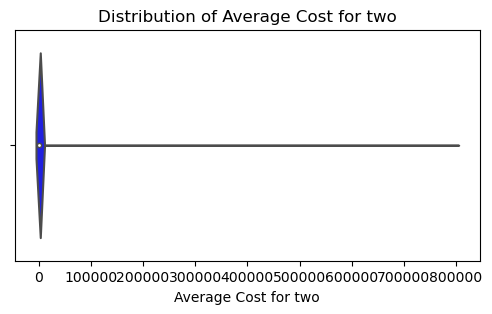

In [22]:
# Visualizing It
plt.figure(figsize=(6,3))
sns.violinplot(x='Average Cost for two', data=df, color='blue')
plt.title('Distribution of Average Cost for two')
plt.show()

 Univariate Analysis on our Second Target (Price Range)

In [23]:
count = df['Price range'].value_counts()
percentage = df['Price range'].value_counts(normalize=True) * 100

result= pd.DataFrame({'Count': count, 'Percentage': percentage})
result

,Count,Percentage
1,4444,46.529159
2,3113,32.593446
3,1408,14.741912
4,586,6.135483


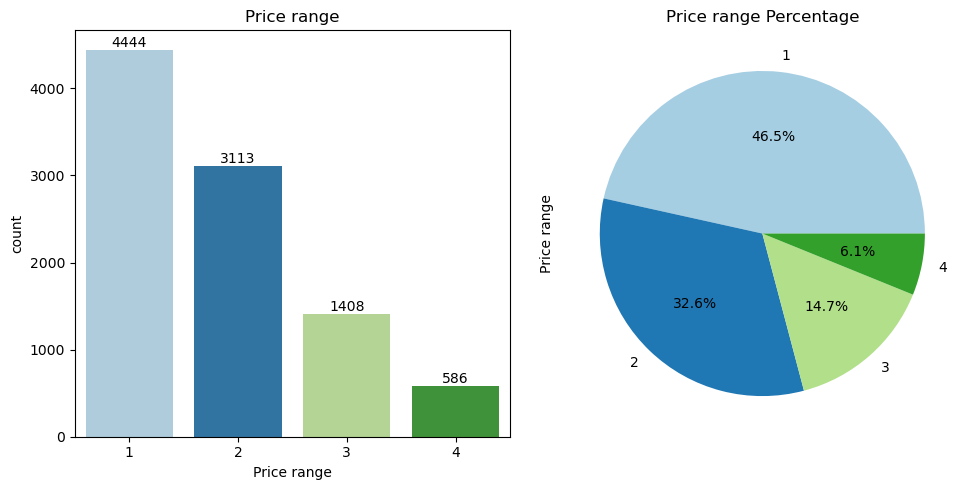

In [24]:
#Visualizing it
fig,axes =plt.subplots(1,2, figsize=(10,5))
sns.set_palette("Paired")

# First plot: Count Plot
ax = sns.countplot(x='Price range', data=df, ax=axes[0])
for container in ax.containers:
        ax.bar_label(container)
axes[0].set_title("Price range")

# Second Plot: Percentage count
df['Price range'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Price range Percentage")

plt.tight_layout()
plt.show()

In [25]:
#Univariate Analysis on Restaurant Name
restaurant_counts = df['Restaurant Name'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each restaurant
percentage_per_restaurant = (restaurant_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': restaurant_counts, 'Percentage': percentage_per_restaurant})
result_df.head(10)

,Count,Percentage
Cafe Coffee Day,83,0.869019
Domino's Pizza,79,0.827139
Subway,63,0.659617
Green Chick Chop,51,0.533975
McDonald's,48,0.502565
Keventers,34,0.355984
Pizza Hut,30,0.314103
Giani,29,0.303633
Baskin Robbins,28,0.293163
Barbeque Nation,26,0.272223


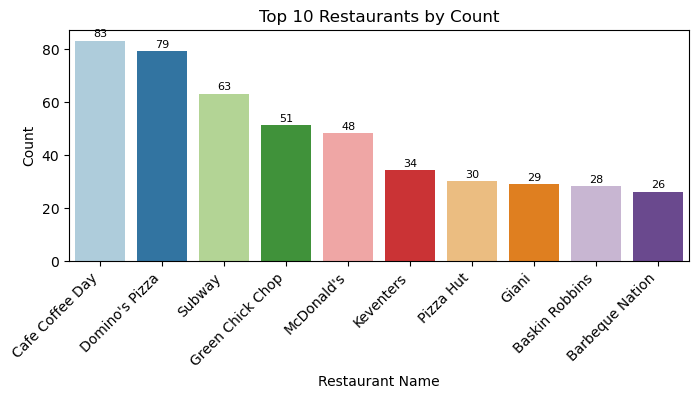

In [26]:
top_10_restaurants = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x=top_10_restaurants.index, y='Count', data=top_10_restaurants, palette='Paired')
plt.title('Top 10 Restaurants by Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


### Univariate Analysis on City

In [27]:
city_counts = df['City'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each city
percentage_per_city = (city_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': city_counts, 'Percentage': percentage_per_city})
result_df.head(5)


,Count,Percentage
New Delhi,5473,57.302900
Gurgaon,1118,11.705581
Noida,1080,11.307716
Faridabad,251,2.627997
Ghaziabad,25,0.261753


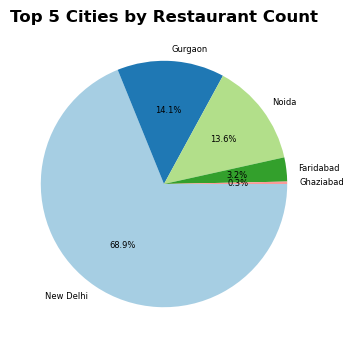

In [28]:
# Top 5 cities
top_5_cities = result_df.head(5)

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_5_cities['Count'], labels=top_5_cities.index, autopct='%1.1f%%', counterclock=False, textprops={'fontsize': 6})
plt.title('Top 5 Cities by Restaurant Count', fontweight='bold')
plt.show()

In [29]:
# Analysis on Locality
locality_counts = df['Locality'].value_counts().sort_values(ascending=False)
total_entries = len(df)

# Calculate the percentage for each Locality
percentage_per_city = (locality_counts / total_entries) * 100

# Combine counts and percentages into a DataFrame
result_df = pd.DataFrame({'Count': locality_counts, 'Percentage': percentage_per_city})
result_df.head(10)


,Count,Percentage
Connaught Place,122,1.277353
Rajouri Garden,99,1.036541
Shahdara,87,0.910899
Defence Colony,86,0.900429
Pitampura,85,0.889959
Malviya Nagar,85,0.889959
Mayur Vihar Phase 1,84,0.879489
Rajinder Nagar,81,0.848079
Safdarjung,80,0.837609
Satyaniketan,79,0.827139


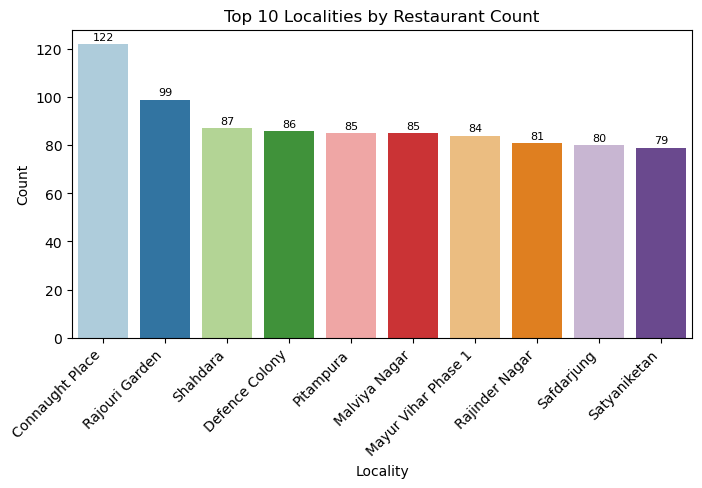

In [30]:
# Top 10 localities
top_10_localities = result_df.head(10)

# Plotting
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_10_localities.index, y='Count', data=top_10_localities)
plt.title('Top 10 Localities by Restaurant Count')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [31]:
# Analysis on Cuisines
df['Cuisines'].value_counts().sort_values(ascending=False)[:10]

North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

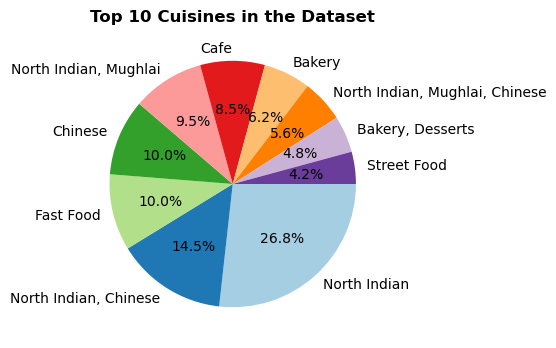

In [32]:
# Top 10 cuisines
top_10_cuisines = df['Cuisines'].value_counts().sort_values(ascending=False)[:10]

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_10_cuisines, labels=top_10_cuisines.index, autopct='%1.1f%%', counterclock=False)
plt.title('Top 10 Cuisines in the Dataset', fontweight='bold')
plt.show()

# Bivariate Analysis
 Categorical Features with our First Target (Average Cost for two)

In [33]:
# Iterate through each categorical column
for col in categorical_columns:
    
    # Group by categorical column with 'Average Cost for two'
    avg_price = df.groupby([col])['Average Cost for two'].mean()
    
    # Calculate the percentage of 'Average Cost for two' for each category in the current column
    percentages = (df.groupby([col])['Average Cost for two'].count() / len(df) * 100)
    
    # Create a DataFrame to display the Average Cost for two, counts, and percentages
    result_df = pd.DataFrame({'Average Cost for two': avg_price, 'Percentage': percentages})
    
    # Print the results
    print(f"\nComparison of Average Cost for two across {col}:\n")
    print(result_df)
    print('-' * 60)


Comparison of Average Cost for two across Country:

                Average Cost for two  Percentage
Country                                         
Australia                  24.083333    0.251283
Brazil                    134.666667    0.628206
Canada                     36.250000    0.041880
India                     623.370319   90.587373
Indonesia              281190.476190    0.219872
New Zealand                69.750000    0.418804
Phillipines              1606.818182    0.230342
Qatar                     223.750000    0.209402
Singapore                 155.750000    0.209402
South Africa              419.733333    0.628206
Sri Lanka                2375.000000    0.209402
Turkey                     84.852941    0.355984
UAE                       166.416667    0.628206
United Kingdom             47.812500    0.837609
United States              26.152074    4.544027
------------------------------------------------------------

Comparison of Average Cost for two across Restaurant

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 134 (\x86) missing from current font.
  fi

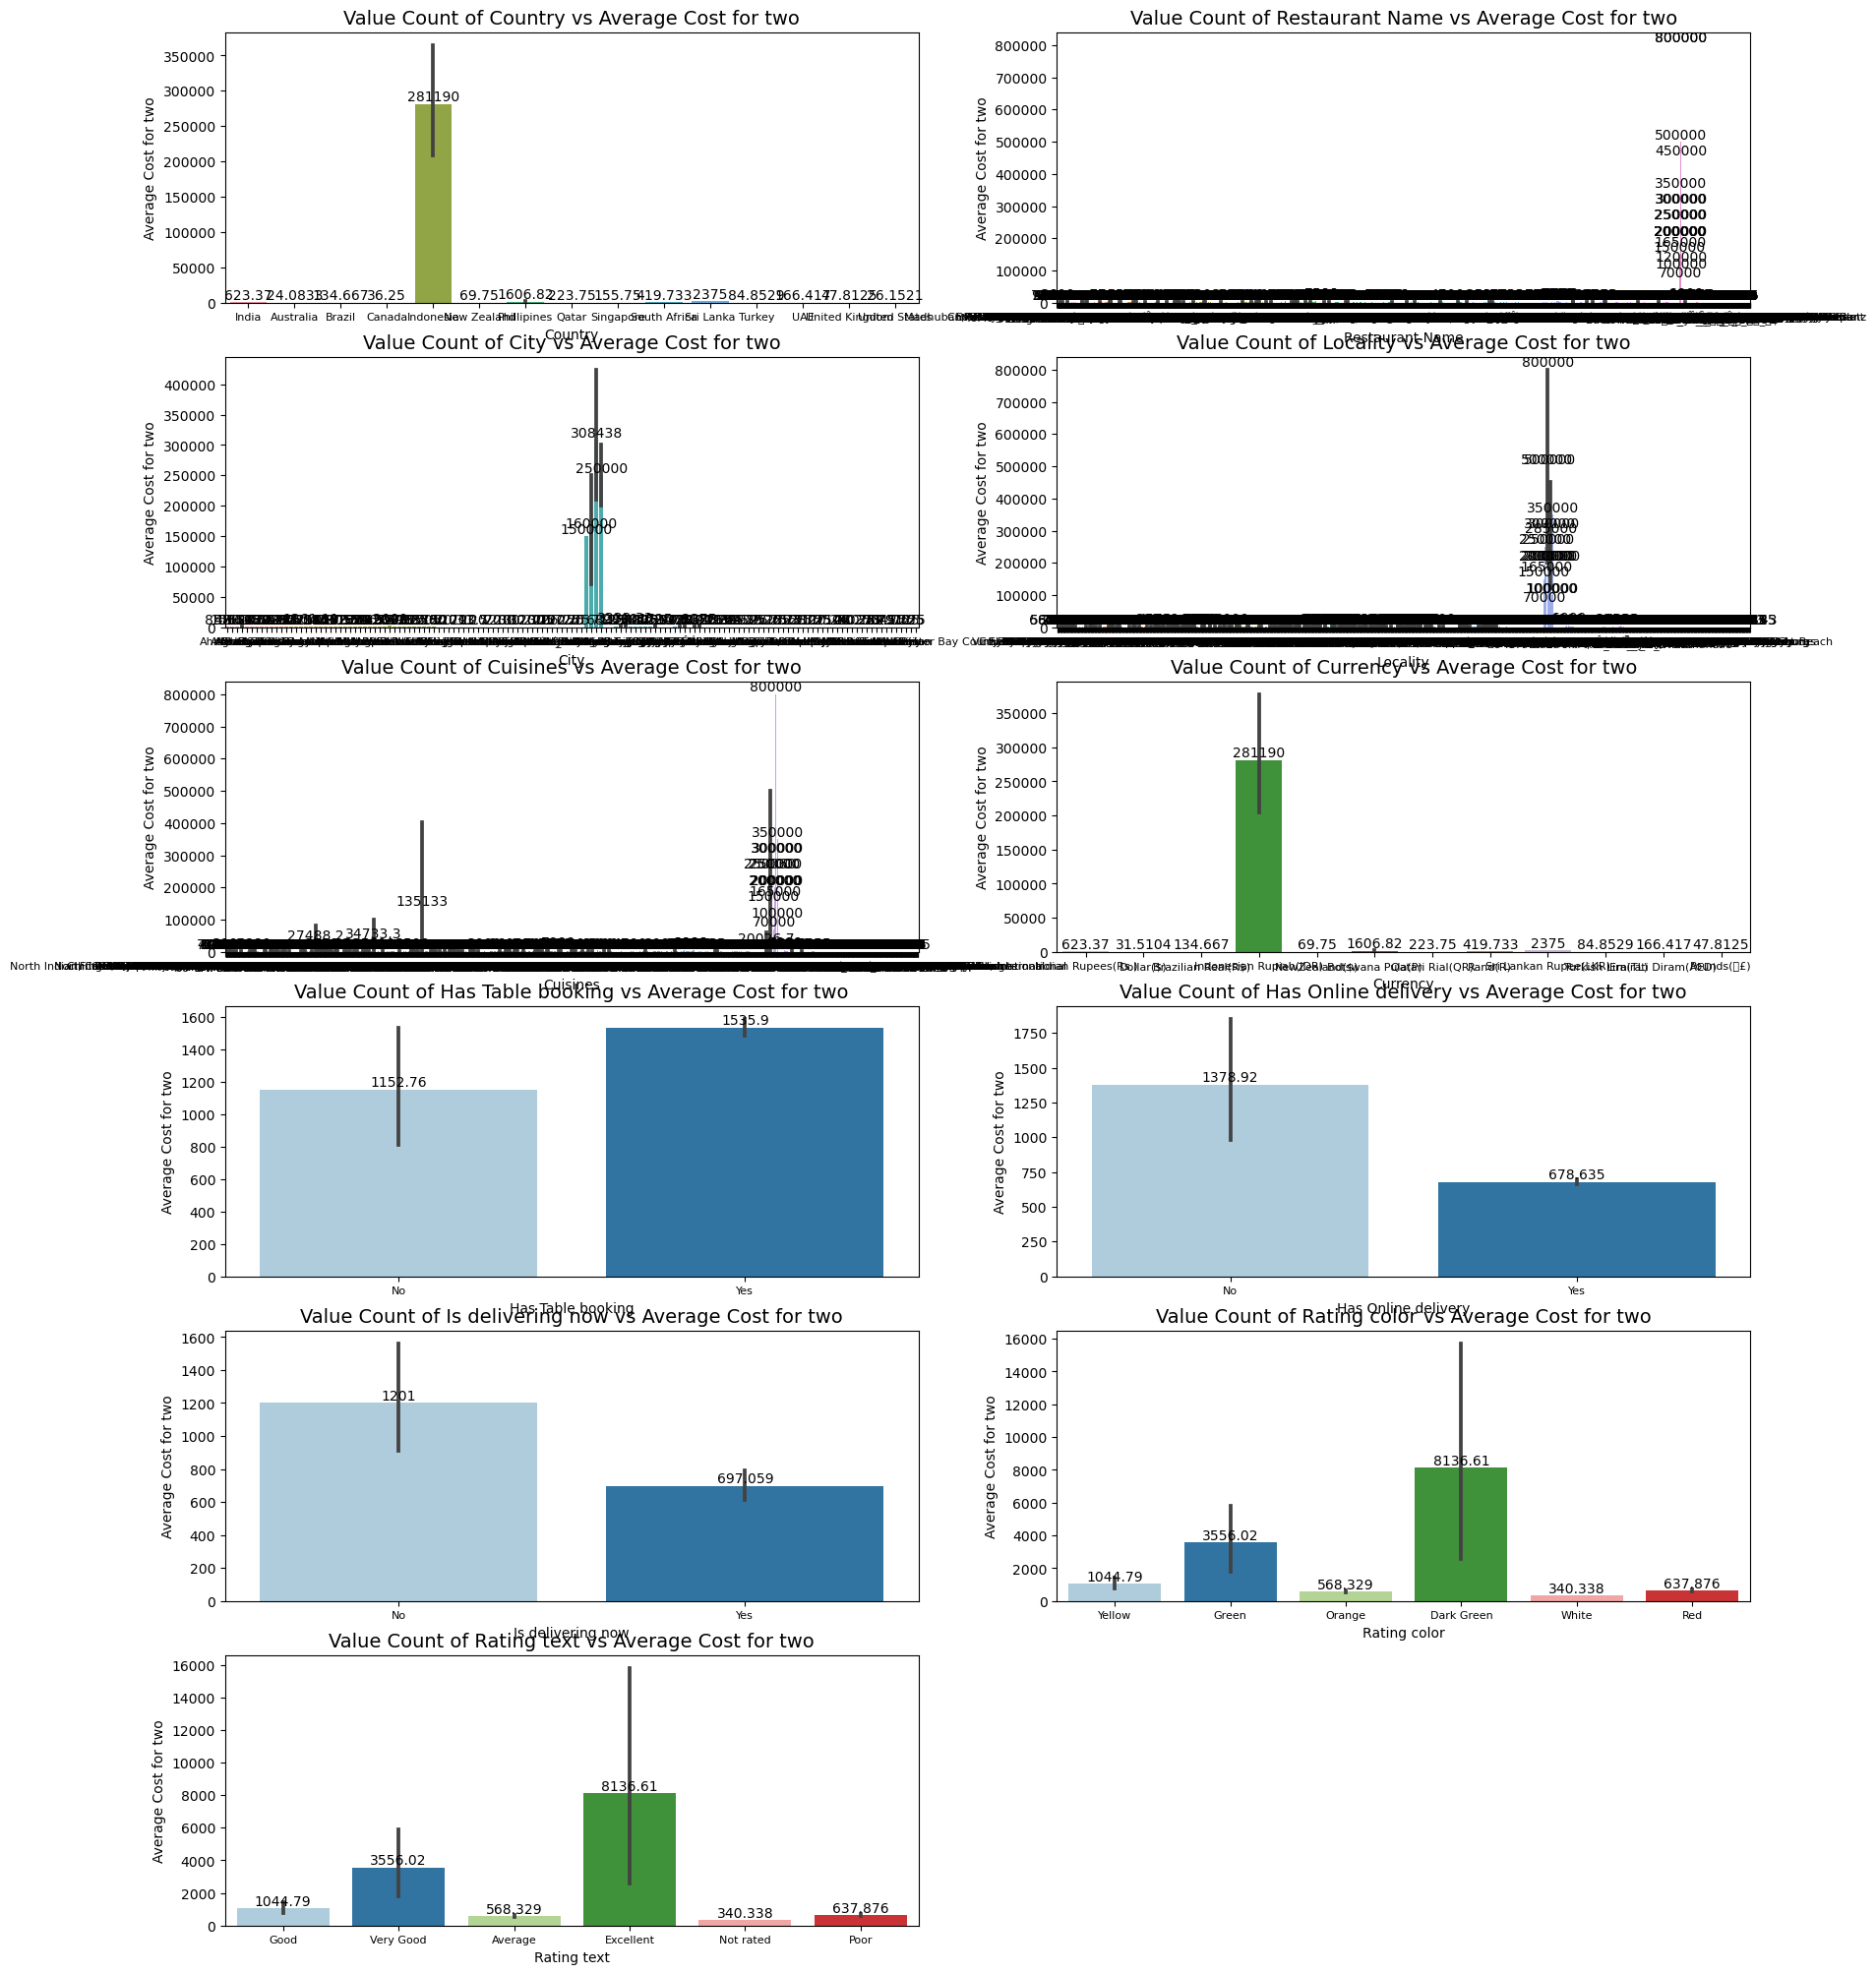

In [35]:
# Visualization of Categorical column Vs Average Cost for two
plt.figure(figsize=(20,25))
p=1

for i in categorical_columns:
    if p<=12:
        plt.subplot(6,2,p)
        ax= sns.barplot(x=i, y='Average Cost for two',data=df)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Average Cost for two', fontsize=14)
        plt.xticks(fontsize=8)
    p+=1
plt.show()

In [36]:
##Numerical Features with our Second Target (Price range)

# Iterate through each numerical column
for col in numerical_columns:
    
    # Group by categorical column with 'Price range'
    avg_price = df.groupby([col])['Price range'].mean()
    
    # Calculate the percentage of 'Price range' for each category in the current column
    percentages = (df.groupby([col])['Price range'].count() / len(df) * 100)
    
    # Create a DataFrame to display the Price range, counts, and percentages
    result_df = pd.DataFrame({'Price range': avg_price, 'Percentage': percentages})
    
    # Print the results
    print(f"\nComparison of Price range {col}:\n")
    print(result_df)
    print('*' * 60)


Comparison of Price range Country Code:

              Price range  Percentage
Country Code                         
1                1.721683   90.587373
14               2.125000    0.251283
30               3.400000    0.628206
37               2.500000    0.041880
94               2.952381    0.219872
148              3.150000    0.418804
162              3.363636    0.230342
166              3.650000    0.209402
184              3.650000    0.209402
189              3.583333    0.628206
191              2.850000    0.209402
208              2.823529    0.355984
214              3.216667    0.628206
215              2.750000    0.837609
216              2.046083    4.544027
************************************************************

Comparison of Price range Average Cost for two:

                      Price range  Percentage
Average Cost for two                         
0                            1.00    0.188462
7                            1.00    0.041880
10               

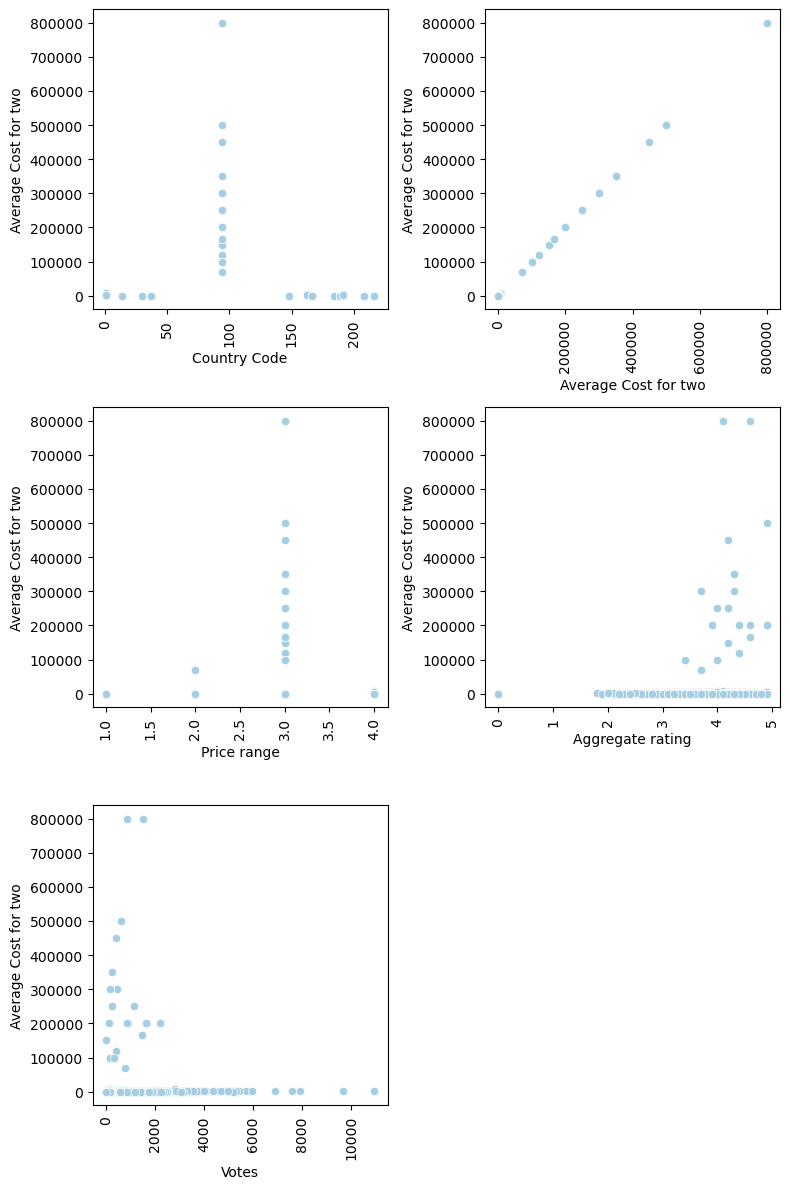

In [37]:
# Determine the number of rows and columns for the subplot grid
num_rows = (len(numerical_columns) + 1) // 2
num_cols = 2

# Create the subplot grid
plt.figure(figsize=(8, 4 * num_rows))

# Plot each numerical column against 'Average Cost for two'
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=df, x=col, y='Average Cost for two')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Average Cost for two')

plt.tight_layout()
plt.show()


In [38]:
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


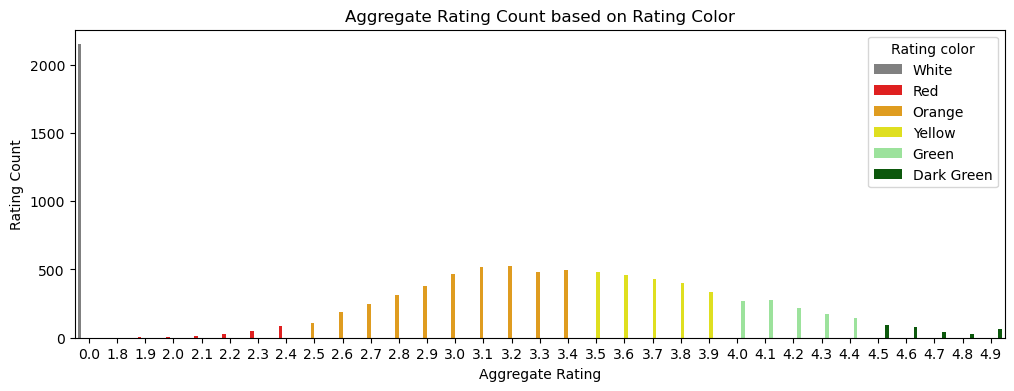

In [39]:
# Mapping rating color to a custom color palette
color_palette = {
    "Red": "red",
    "Orange": "orange",
    "Yellow": "yellow",
    "Green": "lightgreen",
    "Dark Green": "darkgreen",
    "White": "grey"
}

# Visualizing Aggregate Rating Count based on Rating Color with custom colors
plt.figure(figsize=(12, 4))
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', palette=color_palette, data=rating)
plt.title('Aggregate Rating Count based on Rating Color')
plt.xlabel('Aggregate Rating')
plt.ylabel('Rating Count')
plt.show()

# Restaurant name by Our Targets

 Comparing with our First Target (Average Cost for two)

In [40]:
# Calculate average cost for two for each restaurant
avg_price_restaurants = df.groupby('Restaurant Name')['Average Cost for two'].mean()

# Sort by average cost for two in ascending order
ascending_order = avg_price_restaurants.sort_values().head(10)

# Sort by average cost for two in descending order
descending_order = avg_price_restaurants.sort_values(ascending=False).head(10)

# Create DataFrames for both orders
ascending_df = pd.DataFrame({'Restaurant Name': ascending_order.index, 'Average Cost for Two (Ascending)': ascending_order.values})
descending_df = pd.DataFrame({'Restaurant Name': descending_order.index, 'Average Cost for Two (Descending)': descending_order.values})

# Concatenate DataFrames side by side
side_by_side_df = pd.concat([ascending_df, descending_df], axis=1)
side_by_side_df

,Restaurant Name,Average Cost for Two (Ascending),Restaurant Name,Average Cost for Two (Descending)
0,Azteca,0.0,Skye,800000.0
1,Senor Iguanas,0.0,Satoo - Hotel Shangri-La,800000.0
2,BMG - All Day Dining,0.0,Sushi Masa,500000.0
3,The BrewMaster,0.0,3 Wise Monkeys,450000.0
4,VNS Live Studio,0.0,Avec Moi Restaurant and Bar,350000.0
5,HI Lite Bar & Lounge,0.0,Onokabe,300000.0
6,Royal Hotel,0.0,Lucky Cat Coffee & Kitchen,300000.0
7,Cookie Shoppe,0.0,MONKS,250000.0
8,Happy Joe's Pizza & Ice Cream,0.0,Lemongrass,250000.0
9,Sheroes Hangout,0.0,Talaga Sampireun,200000.0


 Comparing with our Second Target (Price range)

In [41]:
# Calculate Price range for each restaurant
price_restaurants = df.groupby('Restaurant Name')['Price range'].mean()

# Sort by average cost for two in ascending order
ascending_order = price_restaurants.sort_values().head(10)

# Sort by average cost for two in descending order
descending_order = price_restaurants.sort_values(ascending=False).head(10)

# Create DataFrames for both orders
ascending_df1 = pd.DataFrame({'Restaurant Name': ascending_order.index, 'Price range (Ascending)': ascending_order.values})
descending_df1 = pd.DataFrame({'Restaurant Name': descending_order.index, 'Price range (Descending)': descending_order.values})

# Concatenate DataFrames side by side
side_by_side_df1 = pd.concat([ascending_df1, descending_df1], axis=1)
side_by_side_df1

,Restaurant Name,Price range (Ascending),Restaurant Name,Price range (Descending)
0,Let's Burrrp,1.0,Huqqa,4.0
1,Maggi Point,1.0,House of Ming - The Taj Mahal Hotel,4.0
2,Madurai Meenakshi Bhawan,1.0,I Am,4.0
3,Madras Coffee House,1.0,Hype,4.0
4,Madly Bangalee,1.0,Baris,4.0
5,Madhuvan Chinese Fast Food,1.0,Spaghetti Kitchen,4.0
6,Maddi Sweet Centre,1.0,The Smokehouse and Grill,4.0
7,Magic Mo:Mo Corner,1.0,Spice - The Indian Kitchen,4.0
8,Madan Sweets & Bakers,1.0,Basil & Thyme,4.0
9,Madan Cafe & Restaurant,1.0,Spice Court - Hotel Maurya,4.0


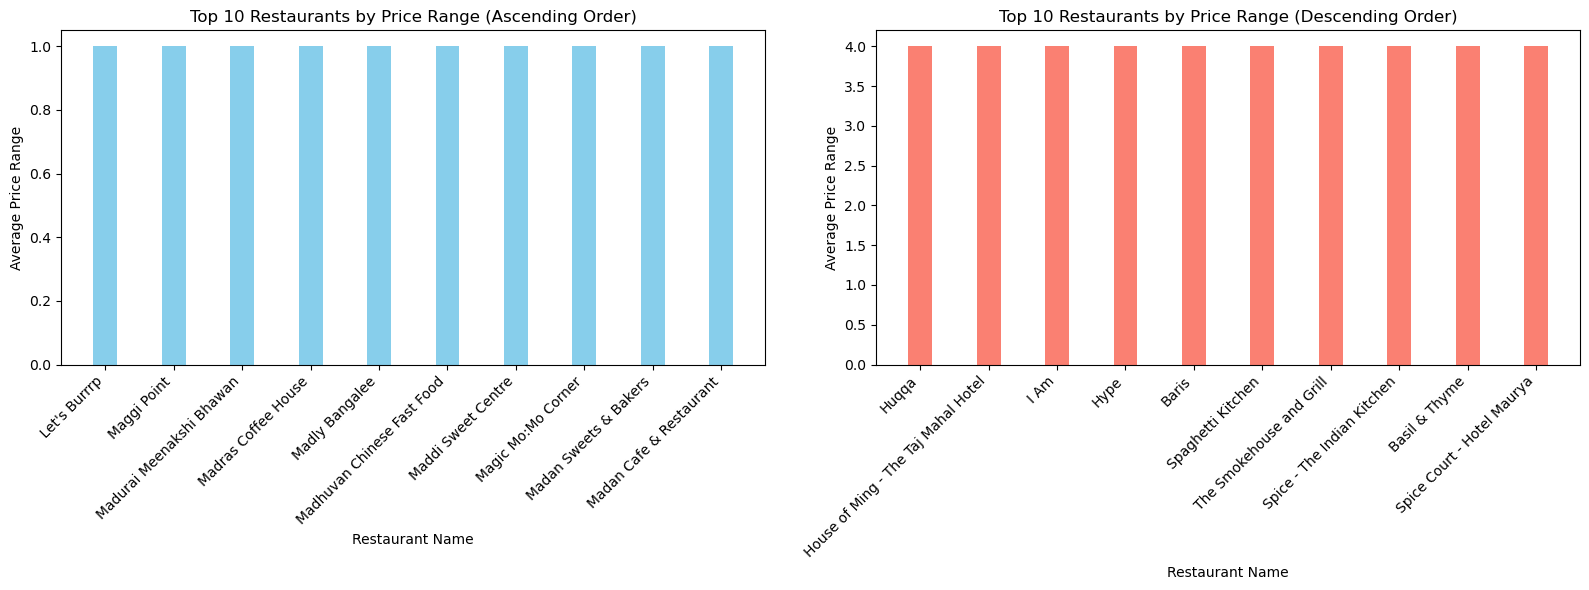

In [42]:
# Set up positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(ascending_df1))

# Create two figures and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for ascending order
ax1.bar(bar_positions, ascending_df1['Price range (Ascending)'], bar_width, label='Ascending Order', color='skyblue')
ax1.set(xticks=bar_positions, xticklabels=ascending_df1['Restaurant Name'], xlabel='Restaurant Name', ylabel='Average Price Range',
        title='Top 10 Restaurants by Price Range (Ascending Order)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Bar plot for descending order
ax2.bar(bar_positions, descending_df1['Price range (Descending)'], bar_width, label='Descending Order', color='salmon')
ax2.set(xticks=bar_positions, xticklabels=descending_df1['Restaurant Name'], xlabel='Restaurant Name', ylabel='Average Price Range',
        title='Top 10 Restaurants by Price Range (Descending Order)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Restaurant name by Aggregate rating

In [43]:
df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10)

Restaurant Name
Atlanta Highway Seafood Market    4.9
Bao                               4.9
Braseiro da Gíçvea                4.9
CakeBee                           4.9
Carnival By Tresind               4.9
Caterspoint                       4.9
Cube - Tasting Kitchen            4.9
Draft Gastro Pub                  4.9
Duck & Waffle                     4.9
Flat Iron                         4.9
Name: Aggregate rating, dtype: float64

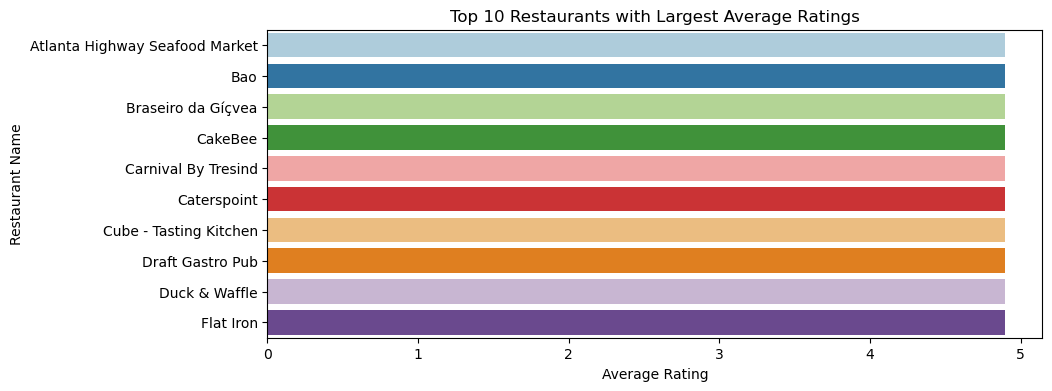

In [44]:
top_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().nlargest(10)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar plot for top 10 restaurants with largest average ratings
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='Paired', ax=ax)

# Set the labels and title
ax.set(xlabel='Average Rating', ylabel='Restaurant Name', title='Top 10 Restaurants with Largest Average Ratings')

# Show the plot
plt.show()

### Restaurant name by Voting

In [45]:
df.groupby('Restaurant Name')['Votes'].mean().nlargest(10)

Restaurant Name
Toit                10934.0
Hauz Khas Social     7931.0
Peter Cat            7574.0
Big Brewsky          5705.0
The Black Pearl      5385.0
BarBQ                5288.0
Warehouse Cafe       4914.0
Truffles             4841.0
Mocambo              4464.0
Gulati               4373.0
Name: Votes, dtype: float64

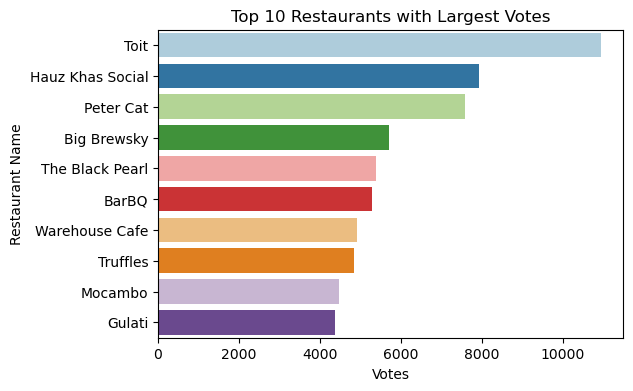

In [46]:
top_votes = df.groupby('Restaurant Name')['Votes'].agg(['mean', 'count']).nlargest(10, 'mean')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# Bar plot for top 10 restaurants with largest Votes
bars = sns.barplot(x=top_votes['mean'], y=top_votes.index, palette='Paired', ax=ax)
ax.set(xlabel='Votes', ylabel='Restaurant Name', title='Top 10 Restaurants with Largest Votes')

# Show the plot
plt.show()


### Comparing our both target

In [47]:
df.groupby('Price range')['Average Cost for two'].mean()

Price range
1     275.182943
2     596.826213
3    5177.268466
4    1848.523891
Name: Average Cost for two, dtype: float64

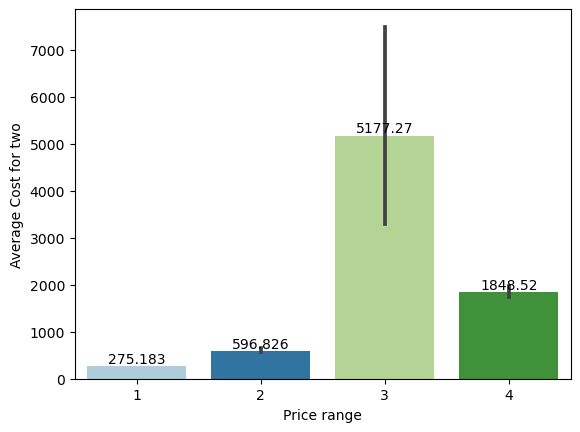

In [52]:
# Visualizing it using barplot
ax=sns.barplot(x='Price range',y='Average Cost for two',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Comparing Rating text vs Average Cost for two

In [53]:
df.groupby('Rating text')['Average Cost for two'].mean()

Rating text
Average       568.328873
Excellent    8136.611296
Good         1044.791429
Not rated     340.337523
Poor          637.876344
Very Good    3556.019462
Name: Average Cost for two, dtype: float64

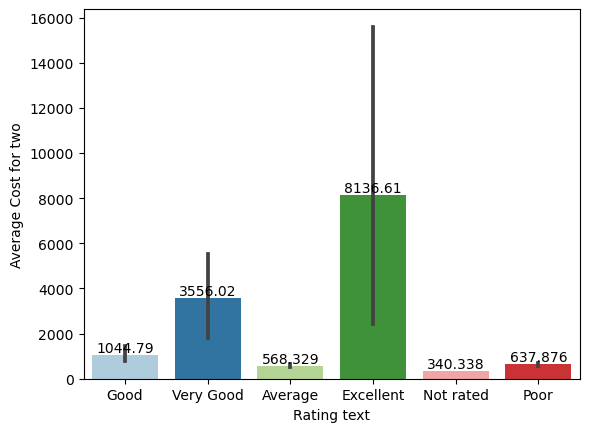

In [54]:
#visualizing it
ax=sns.barplot(x='Rating text',y='Average Cost for two',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Multivariate Analysis

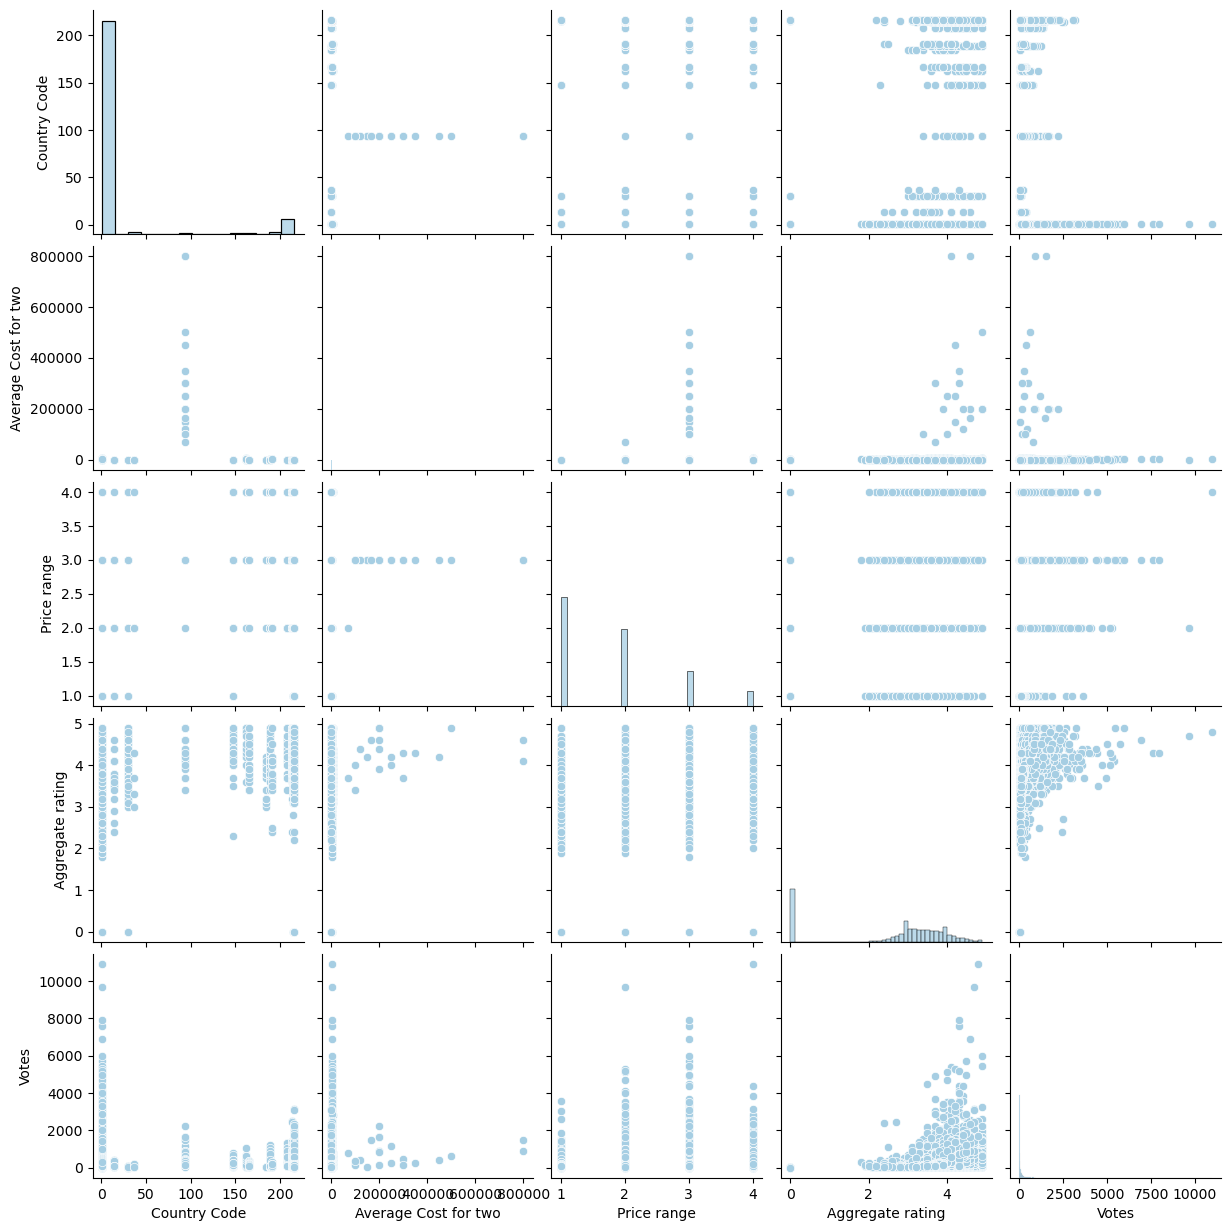

In [55]:
# Visualizing it
sns.pairplot(df)
plt.show()

### Outlier Detection:using boxplot

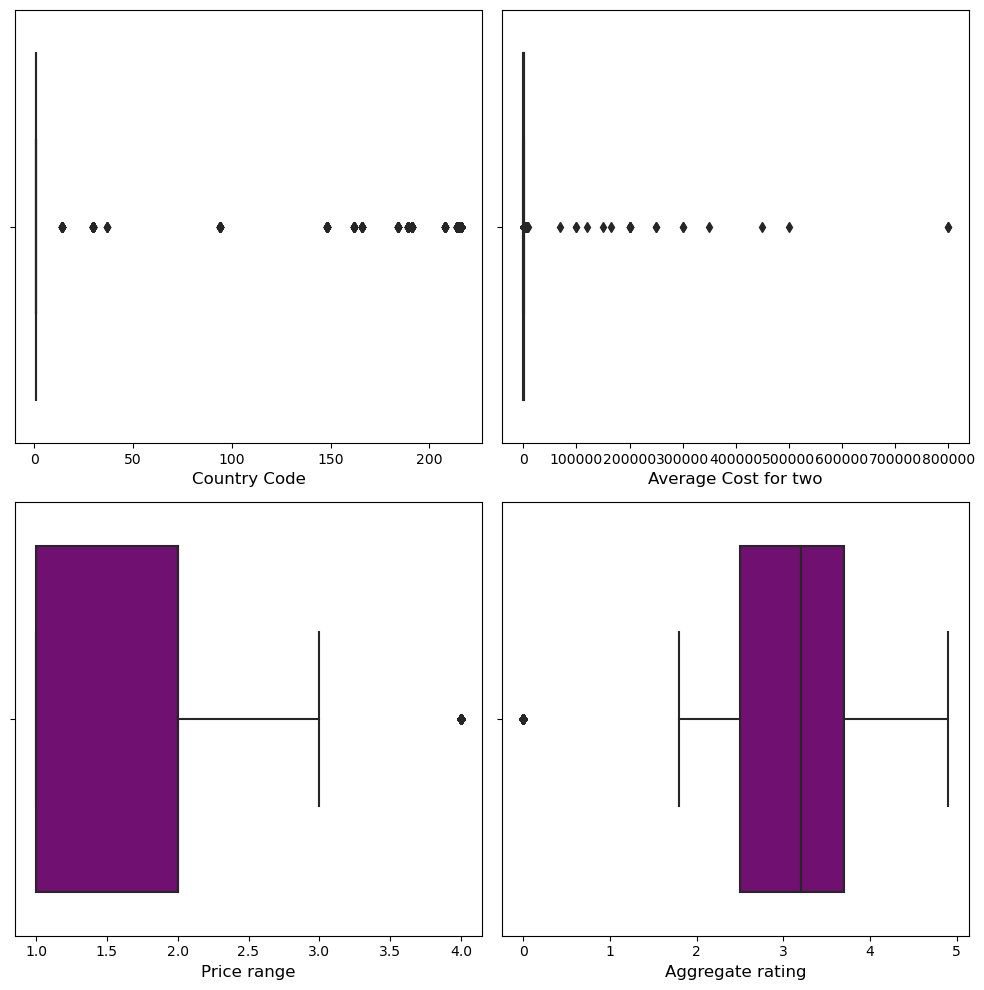

In [56]:
# Identifying the outliers present in numerical columns using boxplot
plt.figure(figsize=(10,10))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=col, data=df,color='purple')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [58]:
# Outlier Treatment, Peprocessor, Scaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


### Outlier Treatment using Zscore

In [59]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[numerical_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(8692, 16)

# Data loss Calculation

In [60]:
# checking the data loss for zscore
data_loss_zscore = (9551-8692)/9551*100
print('Dataloss using zscore:',data_loss_zscore)

Dataloss using zscore: 8.993822636373155


In [61]:
# making new df as our df
df=df1

### skewness detection & Treatment

In [64]:
df.skew()

Country Code            8.892253
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                   3.642933
dtype: float64

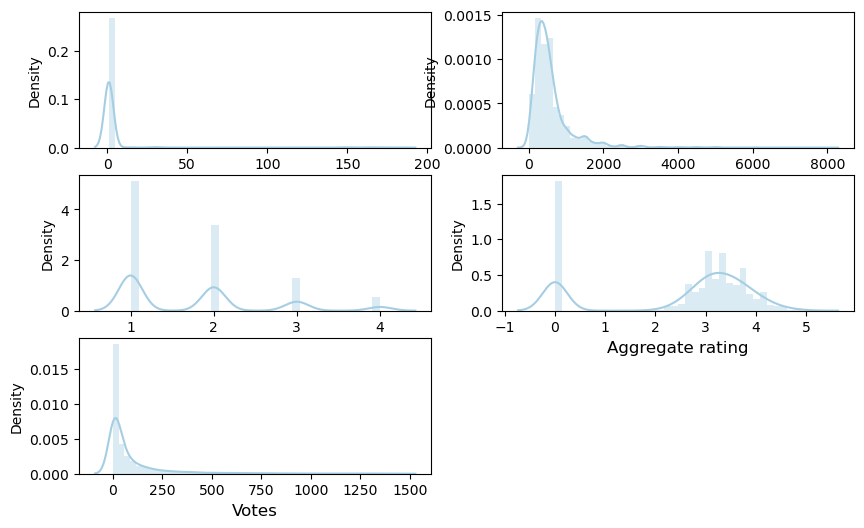

In [65]:
# Visualizing it
plt.figure(figsize=(10,6))
plotnum=1
for col in numerical_columns:
    if plotnum<=5:
        plt.subplot(3,2,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

### Treating Skewness

In [66]:
# using log transformation to remove skewness from the votes
df['Votes'] = np.log1p(df['Votes'])

In [67]:
df.skew()

Country Code            8.892253
Average Cost for two    3.709636
Price range             1.013469
Aggregate rating       -0.882750
Votes                  -0.059095
dtype: float64

## Encoding Categorical Columns

In [68]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.head()

,Country Code,Country,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,3,2876,0,13,1195,850,3,0,0,0,3,3.9,5,2,4.948760
1,1,3,4750,0,13,1195,700,3,0,0,0,2,3.5,5,2,4.276666
2,1,3,6240,0,13,992,500,3,0,0,0,2,3.6,5,2,4.553877
3,1,3,1499,0,132,1311,400,3,0,0,0,2,4.0,1,5,4.477337
4,1,3,4425,0,132,1058,1000,3,0,0,0,3,4.2,1,5,5.181784


# Correlation

In [69]:
df_cor = df.corr()
df_cor

,Country Code,Country,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
Country Code,1.000000,0.610274,0.004689,0.009075,-0.012434,-0.044109,-0.039578,-0.134897,0.002814,-0.074618,-0.007644,0.230706,0.124475,-0.118474,0.080471,0.102145
Country,0.610274,1.000000,0.004521,0.019376,0.007339,0.020133,0.035699,0.326487,0.027328,-0.005570,-0.000571,0.061864,0.020805,-0.025987,0.003735,0.053558
Restaurant Name,0.004689,0.004521,1.000000,0.006436,0.007609,0.061902,0.051733,-0.002097,0.041382,0.031636,0.013011,0.063650,0.026526,-0.004675,0.007766,0.037262
City,0.009075,0.019376,0.006436,1.000000,-0.011575,0.010516,-0.053797,-0.089592,0.000224,-0.014553,-0.022616,-0.095979,-0.093152,0.055375,-0.044033,-0.094763
Locality,-0.012434,0.007339,0.007609,-0.011575,1.000000,-0.014245,-0.040297,0.027547,-0.068965,-0.047330,-0.010910,-0.095929,-0.147017,0.004710,0.003615,-0.173220
Cuisines,-0.044109,0.020133,0.061902,0.010516,-0.014245,1.000000,0.015331,0.050975,0.043543,-0.034442,0.005775,0.011106,-0.052195,-0.040636,-0.065656,-0.031560
Average Cost for two,-0.039578,0.035699,0.051733,-0.053797,-0.040297,0.015331,1.000000,-0.015986,0.617682,0.070133,0.010072,0.769509,0.313600,-0.022528,0.084757,0.412400
Currency,-0.134897,0.326487,-0.002097,-0.089592,0.027547,0.050975,-0.015986,1.000000,-0.028108,0.041141,0.004214,-0.112940,-0.057276,0.056877,-0.019111,-0.001382
Has Table booking,0.002814,0.027328,0.041382,0.000224,-0.068965,0.043543,0.617682,-0.028108,1.000000,0.081710,-0.017811,0.549370,0.210402,-0.017306,0.044730,0.307122
Has Online delivery,-0.074618,-0.005570,0.031636,-0.014553,-0.047330,-0.034442,0.070133,0.041141,0.081710,1.000000,0.102438,0.108409,0.279767,-0.011643,-0.063904,0.364206


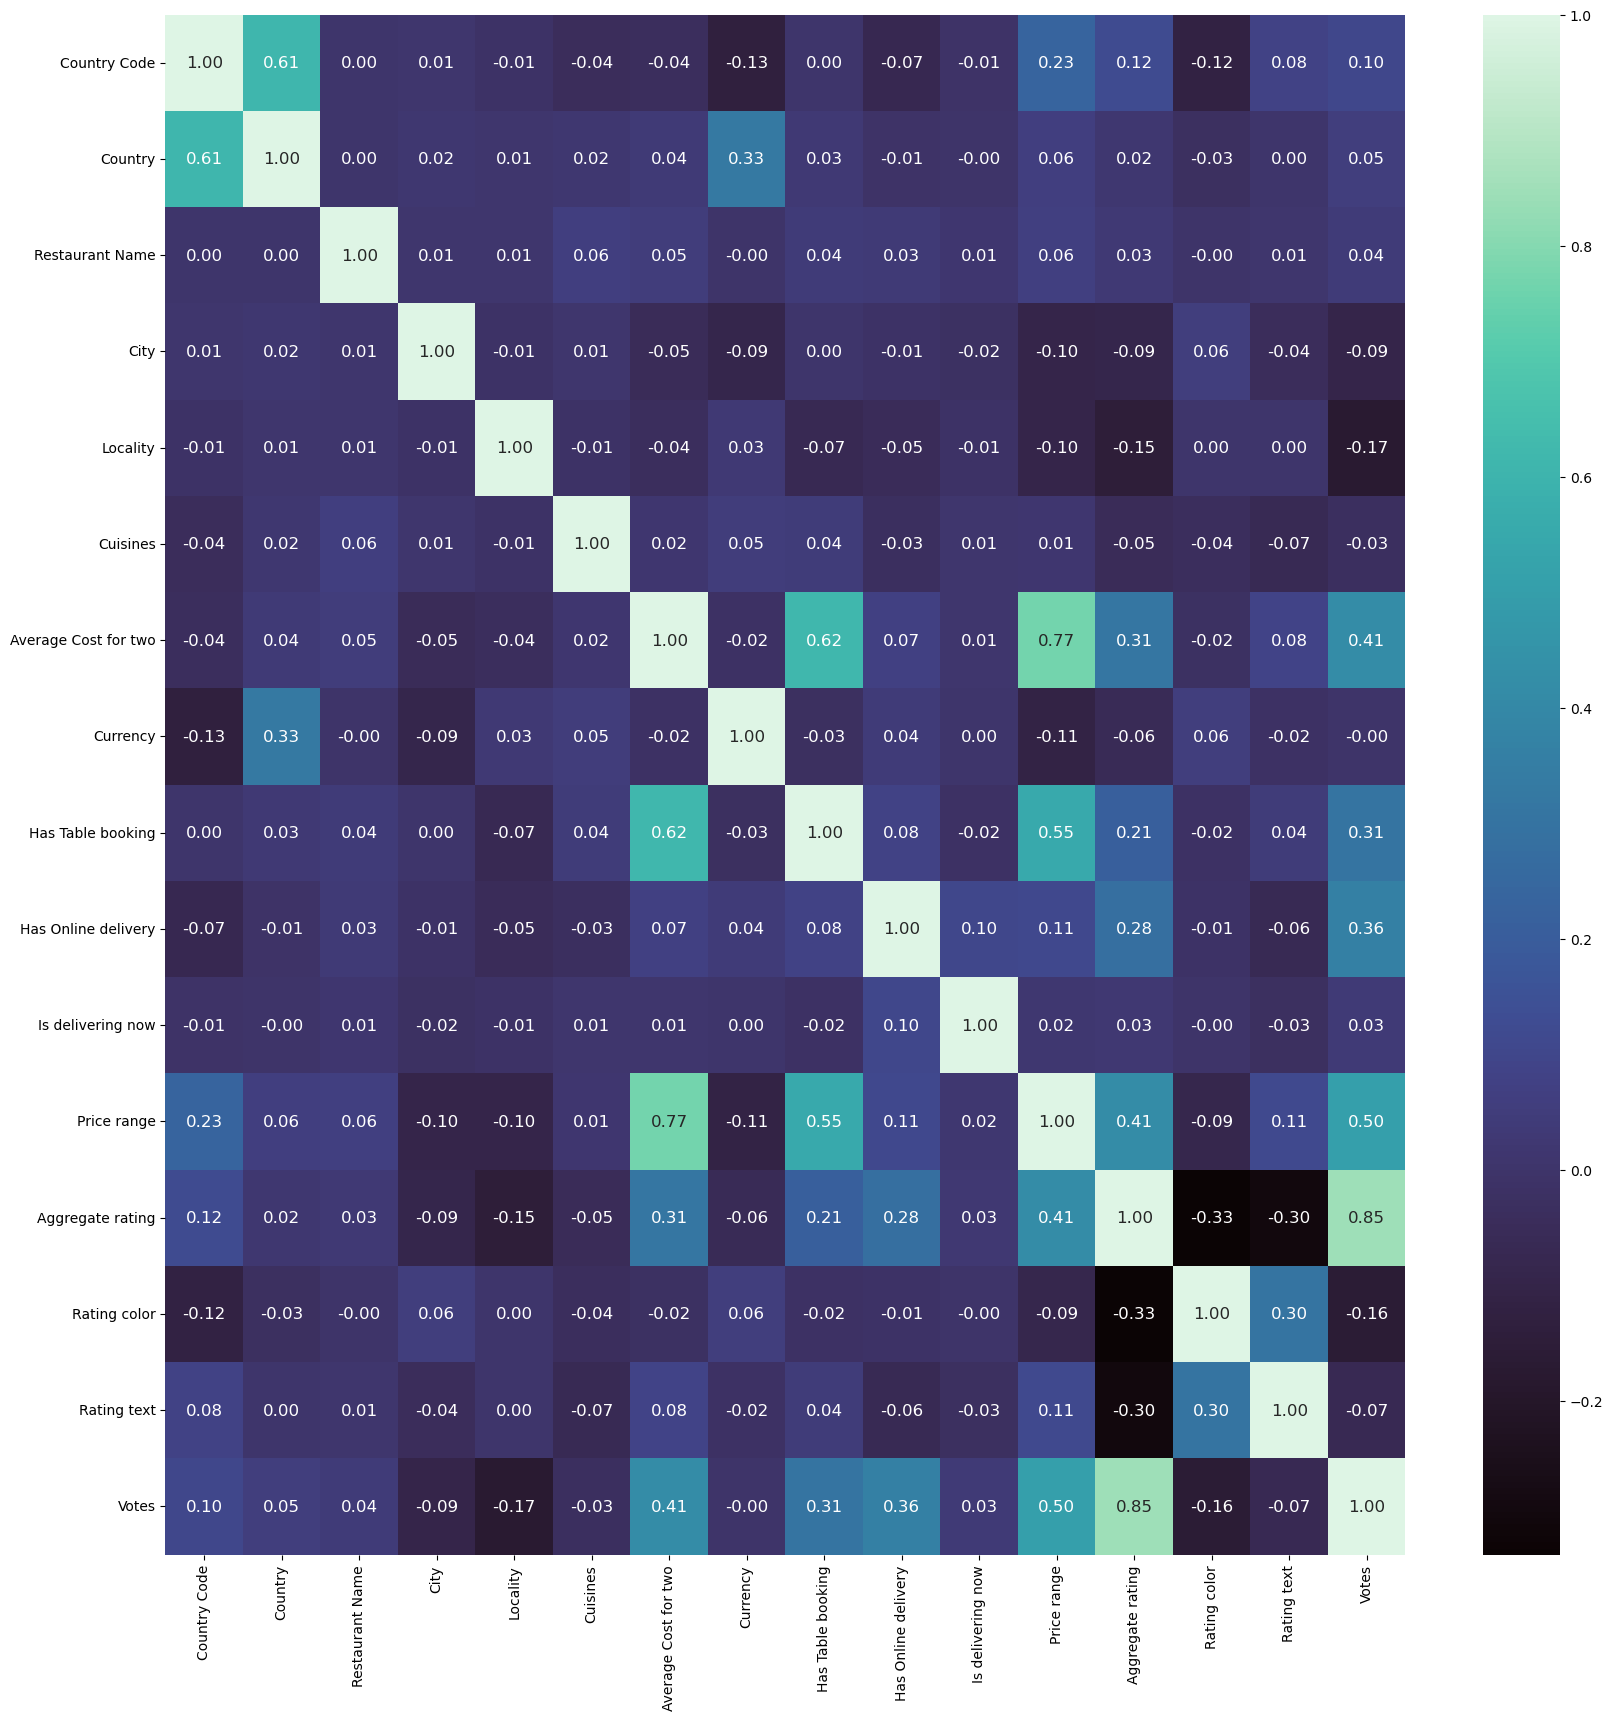

In [70]:
# Visualizing it
plt.figure(figsize=(20, 20))
sns.heatmap(df_cor, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 12})
plt.show()

### Copying dataframe as we have two problem statement

In [71]:
# Copying dataframe
df1 = df.copy()

In [72]:
# Correlation with our first Target (Average cost for two)
#correlation with target column(Average cost for two)
correlation_with_avg = df.corr()['Average Cost for two'].abs().sort_values(ascending=False)
print(correlation_with_avg)

Average Cost for two    1.000000
Price range             0.769509
Has Table booking       0.617682
Votes                   0.412400
Aggregate rating        0.313600
Rating text             0.084757
Has Online delivery     0.070133
City                    0.053797
Restaurant Name         0.051733
Locality                0.040297
Country Code            0.039578
Country                 0.035699
Rating color            0.022528
Currency                0.015986
Cuisines                0.015331
Is delivering now       0.010072
Name: Average Cost for two, dtype: float64


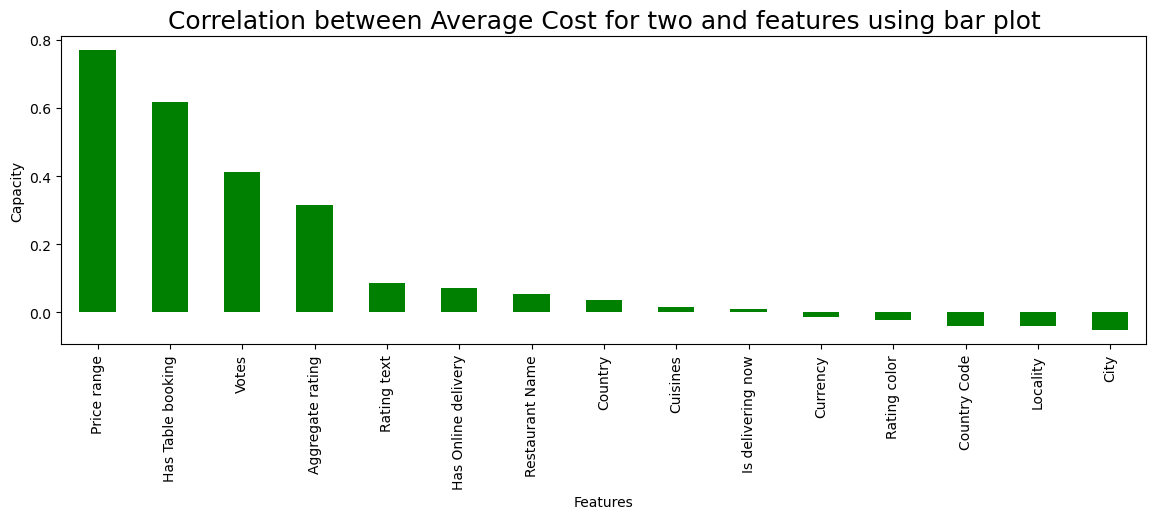

In [74]:
plt.figure(figsize=(14,4))
df.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='green')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between Average Cost for two and features using bar plot',fontsize=18)
plt.show()

Correlation with our second Target (Price range)

In [75]:
#correlation with target column(Price range)
correlation_with_price = df.corr()['Price range'].abs().sort_values(ascending=False)
print(correlation_with_price)

Price range             1.000000
Average Cost for two    0.769509
Has Table booking       0.549370
Votes                   0.504994
Aggregate rating        0.412492
Country Code            0.230706
Currency                0.112940
Rating text             0.112770
Has Online delivery     0.108409
City                    0.095979
Locality                0.095929
Rating color            0.087040
Restaurant Name         0.063650
Country                 0.061864
Is delivering now       0.017023
Cuisines                0.011106
Name: Price range, dtype: float64


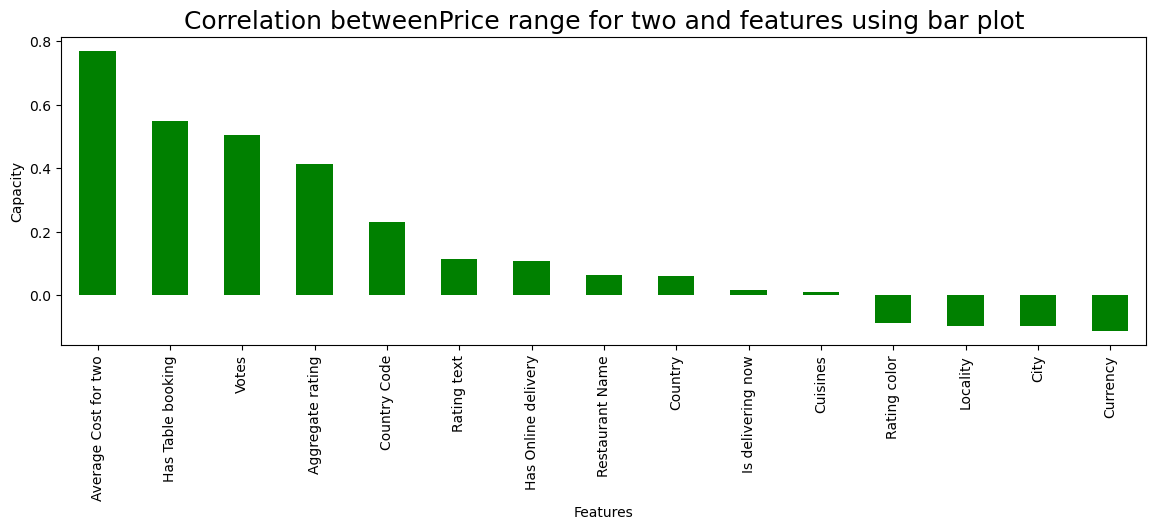

In [76]:
plt.figure(figsize=(14,4))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='green')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation betweenPrice range for two and features using bar plot',fontsize=18)
plt.show()

### Data Splitting for features & label

Data splitting for Average cost for two

In [77]:
# Splitting data in target and dependent feature
X = df.drop(['Average Cost for two'], axis =1)
Y = df['Average Cost for two']

# Checking the dimenstion of X & Y
X.shape, Y.shape

((8692, 15), (8692,))

Data splitting for Price range

In [78]:
# Splitting data in target and dependent feature
X1 = df1.drop(['Price range'], axis =1)
Y1 = df1['Price range']

# Checking the dimenstion of X1 & Y1
X1.shape, Y1.shape

((8692, 15), (8692,))

#### Scaling Features for our first Traget(Average cost for two)

In [79]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
X = pd.DataFrame(X_scale, columns=X.columns)
X

,Country Code,Country,Restaurant Name,City,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,-0.121976,-0.009105,-0.211859,-3.587884,-2.005899,1.040530,0.067252,-0.373878,-0.611743,-0.062666,1.455358,0.909250,1.391309,0.212137,0.974643
1,-0.121976,-0.009105,0.761246,-3.587884,-2.005899,1.040530,0.067252,-0.373878,-0.611743,-0.062666,0.305465,0.644522,1.391309,0.212137,0.624188
2,-0.121976,-0.009105,1.534953,-3.587884,-2.005899,0.551714,0.067252,-0.373878,-0.611743,-0.062666,0.305465,0.710704,1.391309,0.212137,0.768737
3,-0.121976,-0.009105,-0.926889,-3.587884,-1.493209,1.319853,0.067252,-0.373878,-0.611743,-0.062666,0.305465,0.975432,-1.455839,2.060960,0.728826
4,-0.121976,-0.009105,0.592485,-3.587884,-1.493209,0.710640,0.067252,-0.373878,-0.611743,-0.062666,1.455358,1.107797,-1.455839,2.060960,1.096151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,10.321505,11.297270,-0.266382,1.764194,0.105176,1.649743,-3.728549,-0.373878,-0.611743,-0.062666,2.605252,0.445975,-0.744052,-1.020412,0.217384
8688,10.321505,11.297270,1.181333,1.764194,0.531699,-1.750294,-3.728549,-0.373878,-0.611743,-0.062666,2.605252,0.445975,-0.744052,-1.020412,0.184784
8689,10.321505,11.297270,-1.486659,1.764194,1.199489,-1.820125,-3.728549,-0.373878,-0.611743,-0.062666,1.455358,0.843068,1.391309,0.212137,0.150009
8690,10.321505,11.297270,-1.289857,1.764194,1.281347,-0.204384,-3.728549,-0.373878,-0.611743,-0.062666,1.455358,0.909250,1.391309,0.212137,0.262755


### Scaling Features for our second Traget(Price range)

In [80]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)

# Create a DataFrame view of the scaled features after preprocessing
X1 = pd.DataFrame(X1_scale, columns=X1.columns)
X1

,Country Code,Country,Restaurant Name,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-0.121976,-0.009105,-0.211859,-3.587884,-2.005899,1.040530,0.421177,0.067252,-0.373878,-0.611743,-0.062666,0.909250,1.391309,0.212137,0.974643
1,-0.121976,-0.009105,0.761246,-3.587884,-2.005899,1.040530,0.165728,0.067252,-0.373878,-0.611743,-0.062666,0.644522,1.391309,0.212137,0.624188
2,-0.121976,-0.009105,1.534953,-3.587884,-2.005899,0.551714,-0.174871,0.067252,-0.373878,-0.611743,-0.062666,0.710704,1.391309,0.212137,0.768737
3,-0.121976,-0.009105,-0.926889,-3.587884,-1.493209,1.319853,-0.345171,0.067252,-0.373878,-0.611743,-0.062666,0.975432,-1.455839,2.060960,0.728826
4,-0.121976,-0.009105,0.592485,-3.587884,-1.493209,0.710640,0.676627,0.067252,-0.373878,-0.611743,-0.062666,1.107797,-1.455839,2.060960,1.096151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,10.321505,11.297270,-0.266382,1.764194,0.105176,1.649743,-0.924189,-3.728549,-0.373878,-0.611743,-0.062666,0.445975,-0.744052,-1.020412,0.217384
8688,10.321505,11.297270,1.181333,1.764194,0.531699,-1.750294,-0.864584,-3.728549,-0.373878,-0.611743,-0.062666,0.445975,-0.744052,-1.020412,0.184784
8689,10.321505,11.297270,-1.486659,1.764194,1.199489,-1.820125,-0.941219,-3.728549,-0.373878,-0.611743,-0.062666,0.843068,1.391309,0.212137,0.150009
8690,10.321505,11.297270,-1.289857,1.764194,1.281347,-0.204384,-0.958249,-3.728549,-0.373878,-0.611743,-0.062666,0.909250,1.391309,0.212137,0.262755


# Multicollinearity Check

Multicollinearity for our first Target(Average cost for two)

In [81]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,2.247533,Country Code
1,2.272309,Country
2,1.009211,Restaurant Name
3,1.040663,City
4,1.034635,Locality
5,1.029986,Cuisines
6,1.429128,Currency
7,1.508010,Has Table booking
8,1.198962,Has Online delivery
9,1.013611,Is delivering now


Multicollinearity for our second Target (Price range)

In [82]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif


,VIF values,Features
0,2.199774,Country Code
1,2.287716,Country
2,1.008176,Restaurant Name
3,1.035203,City
4,1.038028,Locality
5,1.028877,Cuisines
6,1.871357,Average Cost for two
7,1.434573,Currency
8,1.651637,Has Table booking
9,1.210310,Has Online delivery


### Balance Classes

In [83]:
Y1.value_counts()

1    4298
2    2855
3    1089
4     450
Name: Price range, dtype: int64

In [84]:
# Initiate over-sampler
sm=SMOTE()

X1,Y1=sm.fit_resample(X1,Y1)

# Checking Value count after applying SMOTE
Y1.value_counts()

3    4298
2    4298
4    4298
1    4298
Name: Price range, dtype: int64

### Model Selection

In [87]:
# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Evaluation & Metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Saving Model
import pickle

In [88]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]

Best Models with Best Random State

In [89]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.30)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [90]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state, R2 score, MSE, and MAE
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, X, Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best R2 Score': max_r2,
        'Best Random State': best_random_state,
        'MSE': mse,
        'MAE': mae,
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

,Model,Best R2 Score,Best Random State,MSE,MAE
8,GradientBoostingRegressor,0.879687,17,43722.076341,119.894130
9,XGBRegressor,0.878274,10,40111.150693,113.872348
5,RandomForest,0.876730,25,43946.257498,110.593946
7,Bagging Regressor,0.868118,25,45442.767442,113.497201
10,AdaBoostRegressor,0.832263,17,63164.078671,148.305976
3,Decision Tree,0.806984,29,74149.578221,135.145706
4,KNeighbors,0.802396,72,59363.717868,138.018788
2,Lasso,0.747184,72,75950.393099,167.016503
1,Ridge,0.746659,72,76108.183945,167.577658
0,Linear Regression,0.746647,72,76111.644830,167.605861


Best Models for our First Target(AverageCost for two)

In [91]:
sorted_results_df.head(1)

,Model,Best R2 Score,Best Random State,MSE,MAE
8,GradientBoostingRegressor,0.879687,17,43722.076341,119.89413


Hyperparameter Tunning for our First Target(Average Cost for two)

GradientBoostingRegressor

In [92]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=17, test_size=0.30)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object with parallel processing
random_search = RandomizedSearchCV(estimator=GB_model, param_distributions=param_grid,
                                   n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_GBR = GradientBoostingRegressor(**best_params)

# Perform cross-validation to calculate the R-squared score
cv_scores = cross_val_score(best_GBR, X1, Y1, cv=5, scoring='r2')

# Fit the best regressor on the training data
best_GBR.fit(train_x, train_y)

# Make predictions on the test data
y_pred_GBR = best_GBR.predict(test_x)

# Evaluate the best model
r2_score_GBR = r2_score(test_y, y_pred_GBR)
print('Best R-squared Score (GBR):', r2_score_GBR)

mse = mean_squared_error(test_y, y_pred_GBR)
print('Mean Squared Error (MSE) (GBR):', mse)

mae = mean_absolute_error(test_y, y_pred_GBR)
print('Mean Absolute Error (MAE) (GBR):', mae)

# Print cross-validated R-squared scores
print('Cross-Validated R-squared Scores (GBR):', cv_scores.mean())

Best R-squared Score (GBR): 0.88264471984533
Mean Squared Error (MSE) (GBR): 42805.686330882694
Mean Absolute Error (MAE) (GBR): 117.33385227856213
Cross-Validated R-squared Scores (GBR): 0.5824973859767171


### Initating models for our Second Target (Price range)

In [93]:
#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]

Best Models with Best Random State

In [95]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    best_cv_score = 0

    for random_state in range(1, 101):
        X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X1, Y1, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()],
        "Cross-Validation Score": best_cv_score
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 66
Accuracy: 0.9336952307095774
Precision: 0.9337176112429848
Recall: 0.9336952307095774
F1-Score: 0.9336845828870906
Support: 5158.0
Confusion Matrix:
[[1289   15    0    2]
 [  20 1231   52    3]
 [   0   46 1110  109]
 [   0    0   95 1186]]
Cross-Validation Score: 0.9204299110856022
Model: Decision Tree Classifier
Best Random State: 29
Accuracy: 0.9877859635517643
Precision: 0.9877890661330873
Recall: 0.9877859635517643
F1-Score: 0.9877714337301285
Support: 5158.0
Confusion Matrix:
[[1315    4    0    0]
 [   5 1282   11    0]
 [   0   14 1275   21]
 [   0    0    8 1223]]
Cross-Validation Score: 0.9388154321278982
Model: K-Neighbors Classifier
Best Random State: 22
Accuracy: 0.8978286157425359
Precision: 0.8970784814553007
Recall: 0.8978286157425359
F1-Score: 0.8973933122794531
Support: 5158.0
Confusion Matrix:
[[1100  173   11    0]
 [ 163 1042   74    4]
 [   0   47 1212   34]
 [   0    0   21 1277]]
Cross-Validation Score: 0.8426664

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
3,Random Forest Classifier,37,0.991276,0.991279,0.991276,0.991274,5158.0,"[[[1274, 5, 1, 0], [10, 1286, 9, 0], [0, 6, 12...",0.971269
7,BaggingClassifier,29,0.988949,0.988981,0.988949,0.988939,5158.0,"[[[1316, 3, 0, 0], [6, 1290, 2, 0], [0, 24, 12...",0.944457
1,Decision Tree Classifier,29,0.987786,0.987789,0.987786,0.987771,5158.0,"[[[1315, 4, 0, 0], [5, 1282, 11, 0], [0, 14, 1...",0.938815
4,ExtraTrees Classifier,96,0.987204,0.987215,0.987204,0.987205,5158.0,"[[[1267, 21, 1, 0], [13, 1263, 16, 1], [0, 12,...",0.932532
0,Logistic Regression,66,0.933695,0.933718,0.933695,0.933685,5158.0,"[[[1289, 15, 0, 2], [20, 1231, 52, 3], [0, 46,...",0.920430
8,AdaBoostClassifier,27,0.920512,0.922975,0.920512,0.920232,5158.0,"[[[1282, 7, 1, 0], [34, 1240, 7, 0], [6, 142, ...",0.638949
2,K-Neighbors Classifier,22,0.897829,0.897078,0.897829,0.897393,5158.0,"[[[1100, 173, 11, 0], [163, 1042, 74, 4], [0, ...",0.842666
6,SGDClassifier,39,0.817953,0.816045,0.817953,0.812614,5158.0,"[[[1267, 28, 1, 1], [123, 1016, 147, 7], [0, 3...",0.803863
5,RidgeClassifier,50,0.695425,0.695343,0.695425,0.688028,5158.0,"[[[1069, 177, 35, 2], [527, 571, 189, 11], [11...",0.678399


Best  Models for our Second Target(Price range)

In [96]:
model_performance_df.head(1)

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
3,Random Forest Classifier,37,0.991276,0.991279,0.991276,0.991274,5158.0,"[[[1274, 5, 1, 0], [10, 1286, 9, 0], [0, 6, 12...",0.971269


Hyperparameter Tunning for our First Target(Price range)

Random Forest Classifier

In [98]:
# Data splitting for train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=51)

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(estimator=RFR_model, param_distributions=param_grid_rf,
                                       n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV to find the best parameters
random_search_rf.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params_rf)

# Fit the best classifier on the training data
best_rf.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print("Best Accuracy (Random Forest):", accuracy_rf)

Best Accuracy (Random Forest): 0.9866227219852656
